In [114]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [115]:
# Importing the libraries
import matplotlib.pyplot as plt
import datetime

In [116]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [117]:
!ls

drive  my_model.h5  sample_data


In [118]:
#ubah pathnya sesuai lokasi dataset 
dataset=pd.read_csv('drive/MyDrive/Python2022/DTS-MLT2/openweatherdata-denpasar-1990-2020.csv',index_col="dt_iso",parse_dates=True)

##Explore Dataset

In [119]:
dataset.head()

,dt,timezone,city_name,lat,lon,temp,temp_min,temp_max,pressure,sea_level,...,snow_3h,snow_6h,snow_12h,snow_24h,snow_today,clouds_all,weather_id,weather_main,weather_description,weather_icon
dt_iso,,,,,,,,,,,,,,,,,,,,,
1990-01-01 00:00:00 +0000 UTC,631152000,28800,Denpasar,-8.652497,115.219117,25.82,25.82,25.82,1010.0,NaN,...,NaN,NaN,NaN,NaN,NaN,98,500,Rain,light rain,10d
1990-01-01 01:00:00 +0000 UTC,631155600,28800,Denpasar,-8.652497,115.219117,26.20,26.20,26.20,1011.0,NaN,...,NaN,NaN,NaN,NaN,NaN,91,500,Rain,light rain,10d
1990-01-01 02:00:00 +0000 UTC,631159200,28800,Denpasar,-8.652497,115.219117,26.45,26.45,26.45,1011.0,NaN,...,NaN,NaN,NaN,NaN,NaN,94,500,Rain,light rain,10d
1990-01-01 03:00:00 +0000 UTC,631162800,28800,Denpasar,-8.652497,115.219117,26.80,26.80,26.80,1011.0,NaN,...,NaN,NaN,NaN,NaN,NaN,94,500,Rain,light rain,10d
1990-01-01 04:00:00 +0000 UTC,631166400,28800,Denpasar,-8.652497,115.219117,27.04,27.04,27.04,1010.0,NaN,...,NaN,NaN,NaN,NaN,NaN,76,803,Clouds,broken clouds,04d


In [120]:
#ambil hanya yg curah hujan per jam saja
dataset = dataset[['rain_1h']]

In [121]:
#cek summary
dataset.describe()

,rain_1h
count,16286.000000
mean,0.470510
std,0.677744
min,0.000000
25%,0.150000
50%,0.240000
75%,0.520000
max,19.100000


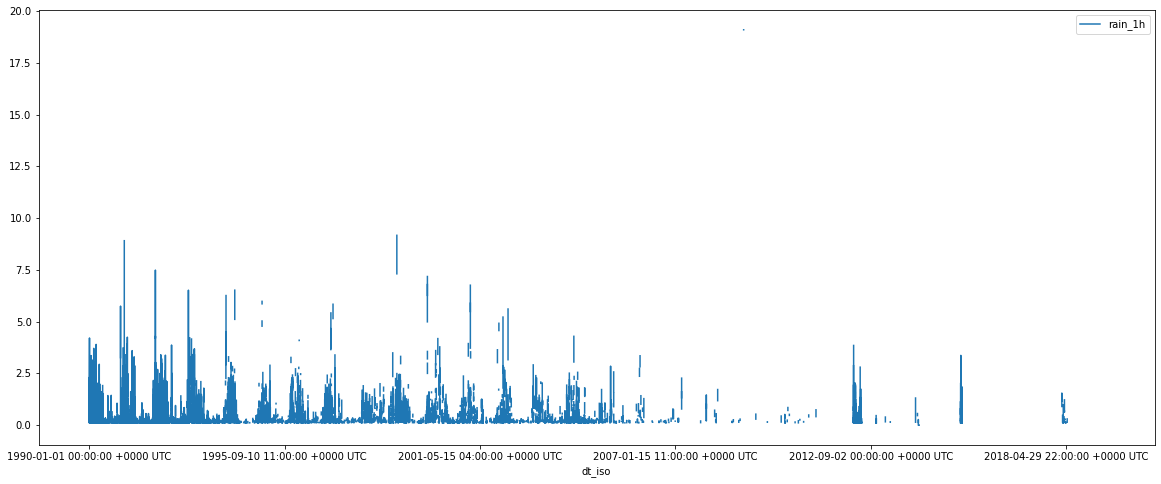

In [122]:
dataset.plot.line(figsize=(20,8))

In [123]:
#cek Nan
dataset.isnull().sum().sum()
#ada 155980 nan

248638

In [124]:
#cek nilai nol
(dataset['rain_1h'] == 0).sum()

2

In [125]:
#Data Nan kita anggap sebagai / diganti dengan nol
dataset['rain_1h'] = dataset['rain_1h'].fillna(0)

In [126]:
#cek baris dg Nan
dataset[dataset.isna().any(axis=1)]
#sudah tidak ada

,rain_1h
dt_iso,


#Visualize

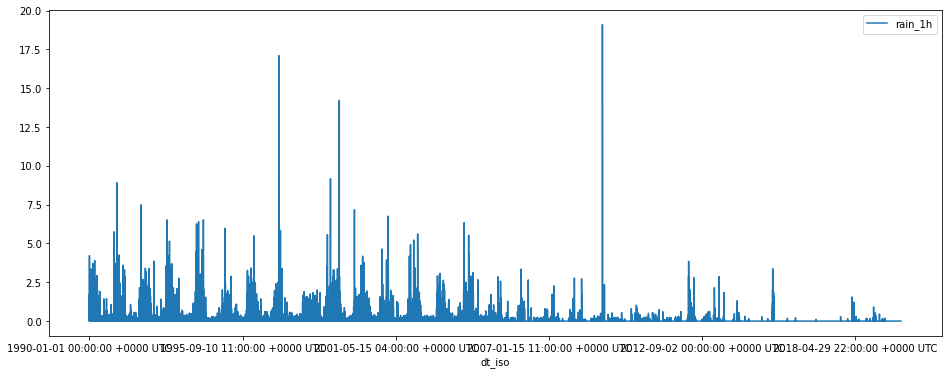

In [127]:
dataset.plot(figsize=(16,6))

In [128]:
#cek tipe data
dataset.dtypes

rain_1h    float64
dtype: object

In [129]:
# daily rolling mean
dataset.rolling(24).mean().head(30)

,rain_1h
dt_iso,
1990-01-01 00:00:00 +0000 UTC,NaN
1990-01-01 01:00:00 +0000 UTC,NaN
1990-01-01 02:00:00 +0000 UTC,NaN
1990-01-01 03:00:00 +0000 UTC,NaN
1990-01-01 04:00:00 +0000 UTC,NaN
1990-01-01 05:00:00 +0000 UTC,NaN
1990-01-01 06:00:00 +0000 UTC,NaN
1990-01-01 07:00:00 +0000 UTC,NaN
1990-01-01 08:00:00 +0000 UTC,NaN


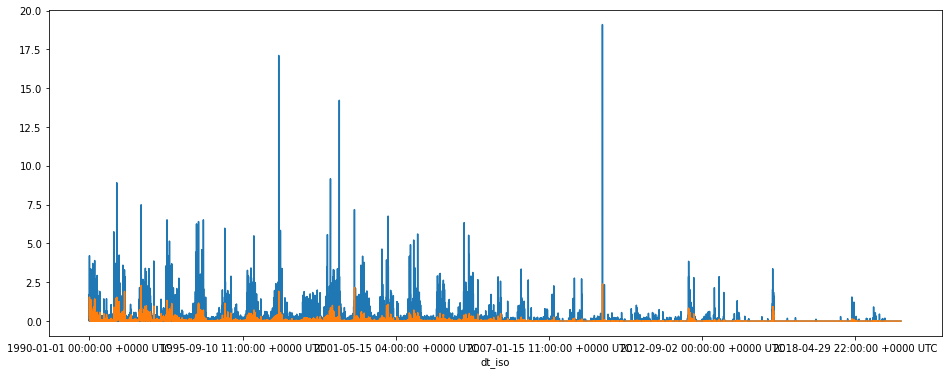

In [130]:
dataset['rain_1h'].plot(figsize=(16,6))
dataset.rolling(window=24).mean()['rain_1h'].plot()

In [131]:
#dataset['Rainfall: 24 Hours Mean'] = dataset['rain_1h'].rolling(window=24).mean()
#dataset[['rain_1h','Rainfall: 24 Hours Mean']].plot(figsize=(16,6))

In [132]:
#divide data into train and test
train_ind = int(len(dataset)*0.8)
training_set = dataset[:train_ind]
test_set = dataset[train_ind:]

In [133]:
len(training_set)

211939

In [134]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set.values)

In [135]:
training_set

,rain_1h
dt_iso,
1990-01-01 00:00:00 +0000 UTC,0.49
1990-01-01 01:00:00 +0000 UTC,0.13
1990-01-01 02:00:00 +0000 UTC,0.24
1990-01-01 03:00:00 +0000 UTC,0.23
1990-01-01 04:00:00 +0000 UTC,0.00
...,...
2014-01-08 21:00:00 +0000 UTC,0.00
2014-01-08 22:00:00 +0000 UTC,0.00
2014-01-08 23:00:00 +0000 UTC,0.00


In [136]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.0.2.


In [137]:
# Creating a data structure with 48 timesteps and 1 output
X_train = []
y_train = []
for i in range(48, len(training_set)):
    X_train.append(training_set_scaled[i-48:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [138]:
#Building the RNN
#Importing the Keras libraries and packages
#from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [139]:
# Initialising the RNN
model = Sequential()

In [140]:
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))# Adding the output layer
model.add(Dense(units = 1))


In [141]:
# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [142]:
#Jangan lupa ganti ke GPU. 10 epoch = 15 menit.
# Fitting the RNN to the Training set
epoch = 6
batch_size = 32
model.fit(X_train, y_train, epochs = epoch, batch_size = batch_size)

Epoch 1/6
6622/6622 [==============================] - 90s 13ms/step - loss: 1.1840e-04
Epoch 2/6
6622/6622 [==============================] - 83s 13ms/step - loss: 1.1165e-04
Epoch 3/6
6622/6622 [==============================] - 83s 13ms/step - loss: 1.1029e-04
Epoch 4/6
6622/6622 [==============================] - 83s 13ms/step - loss: 1.0911e-04
Epoch 5/6
6622/6622 [==============================] - 82s 12ms/step - loss: 1.1013e-04
Epoch 6/6
6622/6622 [==============================] - 83s 12ms/step - loss: 1.0818e-04


In [143]:
model.save('my_model.h5') 

In [144]:
from keras.models import load_model

In [145]:
#model = load_model('drive/MyDrive/Python2022/DTS-MLT2/my_model.h5')

In [146]:
# Making the predictions and visualising the results
real_hourly_rf = test_set.values

In [147]:
real_hourly_rf

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [148]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52985 entries, 2014-01-09 02:00:00 +0000 UTC to 2020-01-07 23:00:00 +0000 UTC
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   rain_1h  52985 non-null  float64
dtypes: float64(1)
memory usage: 827.9+ KB


In [149]:
# Getting the predicted value
dataset_total = pd.concat((training_set['rain_1h'], test_set['rain_1h']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(test_set) - 48:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(48, len(test_set)):
    X_test.append(inputs[i-48:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_hourly_rf = model.predict(X_test)
predicted_hourly_rf = sc.inverse_transform(predicted_hourly_rf)

In [150]:
predicted_hourly_rf=pd.DataFrame(predicted_hourly_rf)
predicted_hourly_rf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52937 entries, 0 to 52936
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       52937 non-null  float32
dtypes: float32(1)
memory usage: 206.9 KB


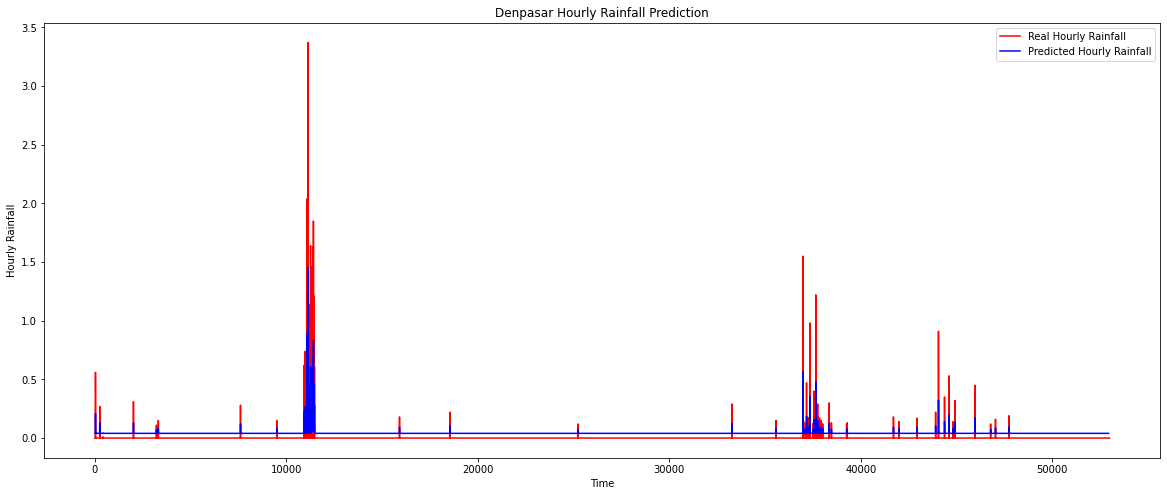

In [159]:
# Visualising the results
plt.rcParams["figure.figsize"] = (20,8)
plt.plot(real_hourly_rf, color = 'red', label = 'Real Hourly Rainfall')
plt.plot(predicted_hourly_rf, color = 'blue', label = 'Predicted Hourly Rainfall')
plt.title('Denpasar Hourly Rainfall Prediction')
plt.xlabel('Time')
plt.ylabel('Hourly Rainfall')
plt.legend()
plt.show()

In [152]:
len(real_hourly_rf[48:])
rhr2 = real_hourly_rf[48:]
#predicted_hourly_rf

In [153]:
from sklearn.metrics import mean_absolute_error as mae

#calculate MAE
mae(rhr2, predicted_hourly_rf)

0.04292698517222188

In [160]:
#dapat mengikuti naik turun, tapi naiknya kurang naik, dan turunnya kurang dekat ke nol